# 泰坦尼克号数据分析

## 数据说明
**数据来源：** Udacity 提供 [titanic-data.csv](https://raw.githubusercontent.com/ShiChJ/DAND-Basic-Materials/master/P2/Project_Files/titanic-data.csv)

**数组字段说明：**

PassengerId：乘客编号，

Survived：乘客是否存活（1：存活、0：死亡），

Pclass：乘客所在的船舱等级（1：一级、2：二级、3：三级），

Name：乘客姓名，

Sex：乘客性别，

Age：乘客年龄，

SibSp：乘客的兄弟姐妹和配偶数量，

Parch：乘客的父母与子女数量，

Ticket：票的编号，

Fare：票价，

Cabin：座位号，

Embarked：乘客登船码头。 

## 分析与探索

依据数据集对性别、年龄、船舱等级、登船码头等对生存死亡率的影响

### 单变量分析
1. 不同的性别生生存死亡率
2. 不同的船舱等级生生存死亡率
3. 不同的年龄生生存死亡率
4. 不同的登船码头生存死亡率

### 双变量分析
1. 性别、船舱等级对生存死亡率

## 读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取泰坦尼克数据
passengers_full = pd.read_csv("titanic-data.csv")
passengers_full.head(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


## 处理缺失数据
观察数据可以发现在 Cabin 与 Age 中有较多的缺失值的数据，为了方便数据的研究，因此把缺失的数据补全为0，表示此处数据有缺失。

In [2]:
passengers = passengers_full.fillna(value=0)
passengers.head(n=8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S


0    549
1    342
Name: Survived, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f343150>], dtype=object)

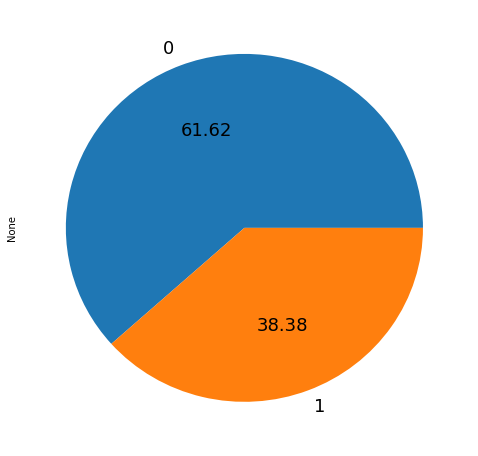

In [3]:
# 生存与死亡的人数
print passengers["Survived"].value_counts()
survived_die = passengers.groupby(["Survived"]).size()
survived_die.plot.pie(subplots=True, autopct='%.2f',figsize=(8,8), fontsize=18)

可以看到死亡的比例很高。

## 单变量分析
### 不同性别对死亡率的影响


male      577
female    314
Name: Sex, dtype: int64
Sex
female     81
male      468
dtype: int64
female    0.257962
male      0.811092
dtype: float64


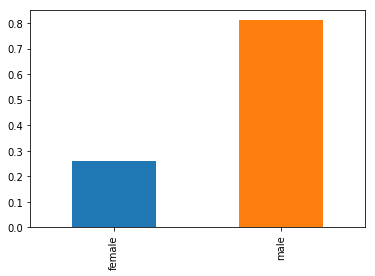

In [4]:
# 不同性别的人数
grouped_sum_sex = passengers["Sex"].value_counts()
grouped_survived_sex = passengers.loc[passengers["Survived"] == 0].groupby(["Sex"]).size()
print grouped_sum_sex
print grouped_survived_sex
rate_survived_sex = (grouped_survived_sex/grouped_sum_sex)
print rate_survived_sex
rate_survived_sex.plot.bar()

#### 分析结论
在总的男女比例大约为2:1(577:314)的情况下，从上图可以看到男性的死亡率比女性高出了很多，大约是女性的四倍。依据电影《泰坦尼克号》片段，在灾难发生时，老人、孩子与女性先逃生，因此女性的生存率要远大于男性。从下图也可以看到在死亡的人数中，男性的比例高达85.25%。

Sex
female     81
male      468
dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1181f7390>], dtype=object)

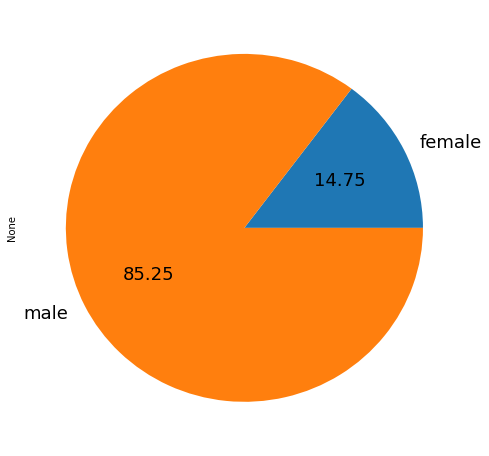

In [5]:
# 死亡人中男女人数
die_passengers = passengers.loc[passengers["Survived"] == 0]
survived_sex = die_passengers.groupby(["Sex"]).size()
print survived_sex
survived_sex.plot(kind="pie", subplots=True, autopct='%.2f',figsize=(8,8), fontsize=18)

### 不同船舱等级对死亡率影响

3    491
1    216
2    184
Name: Pclass, dtype: int64
Pclass
1     80
2     97
3    372
dtype: int64
1    0.370370
2    0.527174
3    0.757637
dtype: float64


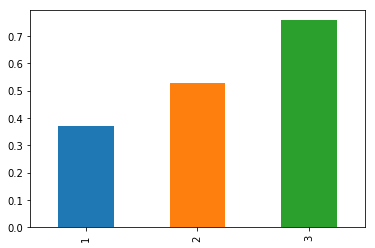

In [6]:
# 对不同船舱等级的人分组
groued_pclass = passengers["Pclass"].value_counts()
survived_groued_pclass = passengers.loc[passengers["Survived"] == 0].groupby(["Pclass"]).size()
rate_survived_pclass = (survived_groued_pclass/groued_pclass)
print groued_pclass
print survived_groued_pclass
print rate_survived_pclass

rate_survived_pclass.plot.bar()

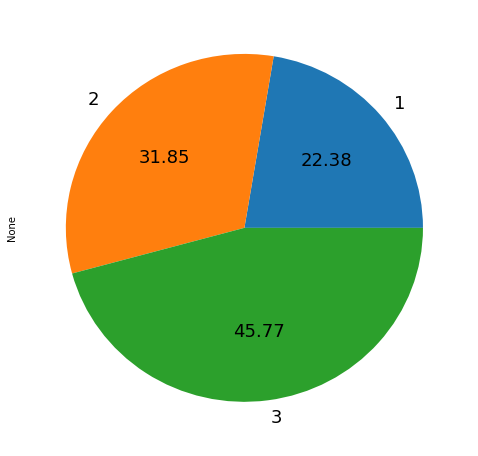

In [7]:
# 不同船舱等级死亡人数占比
rate_survived_pclass.plot.pie(autopct='%.2f',figsize=(8,8), fontsize=18)

#### 分析结论

由上两幅图可以看到，死亡率是 第三等级 > 第二等级 > 第三等级，且在死亡的人数中不同船舱等级人数占比重，第三等级的人占比也是最大的。从第一副图中可以推测，第三等级的船舱应该在船的最底部，这样就增加了逃生的难度，因此第三等级的船舱死亡率较高。从第二幅图中可以看到，第三等级船舱死亡人数咱比最大，从前面的每一船舱等级的人数可以看到，第三等级船舱人数是最多的，加之逃生困难，因此死亡人数占比是最大的。

可以得出，越靠近船的顶部，在发生灾难时生存率就越高。

### 不同的年龄生生存死亡率

80.0
0.42
177
(20, 30]    230
(30, 40]    155
(10, 20]    115
(40, 50]     86
(0, 10]      64
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Age, dtype: int64
(20, 30]    146
(30, 40]     86
(10, 20]     71
(40, 50]     53
(0, 10]      26
(50, 60]     25
(60, 70]     13
(70, 80]      4
Name: Age, dtype: int64
(20, 30]    0.634783
(30, 40]    0.554839
(10, 20]    0.617391
(40, 50]    0.616279
(0, 10]     0.406250
(50, 60]    0.595238
(60, 70]    0.764706
(70, 80]    0.800000
Name: Age, dtype: float64


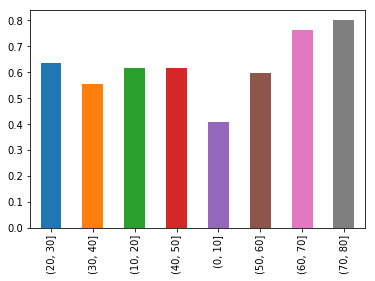

In [8]:
# 找到年龄的最大值与最小值(排除为0的)
max_age = passengers["Age"].max()
min_age = passengers.loc[passengers["Age"] != 0]["Age"].min()
zero_ages = passengers.loc[passengers["Age"] == 0]["Age"].count()              
print max_age
print min_age
print zero_ages

# 对年龄进行分组
age_bins = [0,10,20,30,40,50,60,70,80]
cut_ages_sum = pd.cut(passengers["Age"], age_bins).value_counts()
age_survived = passengers.loc[passengers["Survived"] == 0]

cut_ages_survived = pd.cut(age_survived["Age"], age_bins).value_counts()
print cut_ages_sum
print cut_ages_survived

# 计算死亡率
rate_ages = cut_ages_survived / cut_ages_sum
print rate_ages
rate_ages.plot.bar()

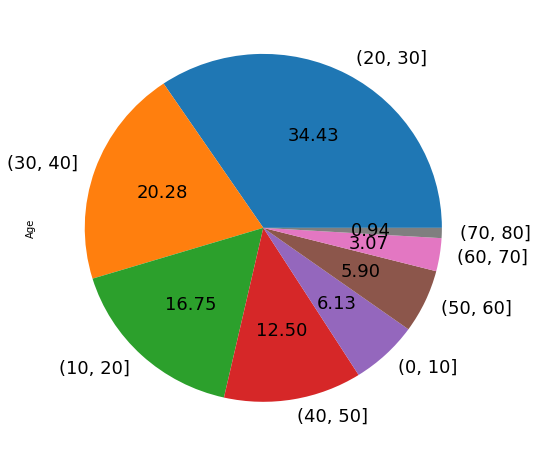

In [9]:
cut_ages_survived.plot.pie(autopct='%.2f',figsize=(8,8), fontsize=18)

#### 分析结论
由上可以看到0~10岁的死亡率是最低的，60~80岁之间的死亡率是最高的，其他年龄端的死亡率相差不大。考虑到有 177 人没有做年龄统计，此处的分析会存在较大的误差。

从第二幅总死亡人数不同年龄段占比来看，2~30岁、30~40岁死亡的认识占比最大。

### 不同的登船码头生存死亡率

Embarked
C    168
Q     77
S    644
dtype: int64
Embarked
C     75
Q     47
S    427
dtype: int64
Embarked
C    0.446429
Q    0.610390
S    0.663043
dtype: float64


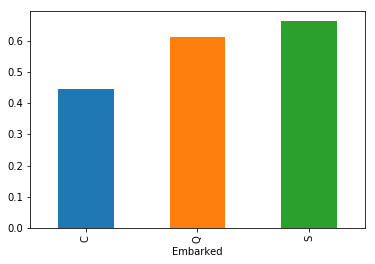

In [10]:
# 对不同船舱等级的人分组
groued_embarked = passengers.loc[passengers["Embarked"]!=0].groupby("Embarked").size()
survived_groued_embarked = passengers.loc[passengers["Survived"] == 0].groupby(["Embarked"]).size()
rate_survived_embarked = survived_groued_embarked/groued_embarked
print groued_embarked
print survived_groued_embarked
print rate_survived_embarked

rate_survived_embarked.plot.bar()

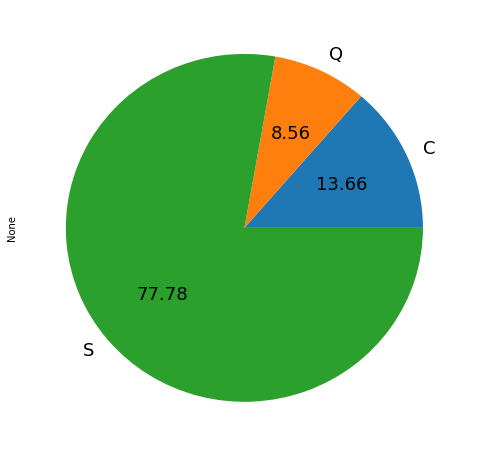

In [11]:
survived_groued_embarked.plot.pie(autopct='%.2f',figsize=(8,8), fontsize=18)

#### 分析结论
不太清楚登船码头是怎么影响的？只可以看到 S 口登录的人员在死亡总人数中占比较大。

## 双变量分析
### 性别、船舱等级对生存死亡率

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347

Sex     female  male
Pclass              
1            3    77
2            6    91
3           72   300

Sex       female      male
Pclass                    
1       0.031915  0.631148
2       0.078947  0.842593
3       0.500000  0.864553


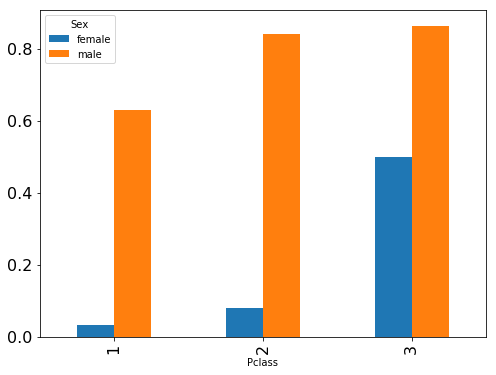

In [12]:
pclass_survived = passengers.groupby(["Pclass", "Sex"]).size()
print pclass_survived.unstack()
print ""
pclass_survived_sex = passengers.loc[passengers["Survived"] == 0].groupby(["Pclass", "Sex"]).size()
print pclass_survived_sex.unstack()
print ""
rate_pclass_sex = (pclass_survived_sex / pclass_survived)
print rate_pclass_sex.unstack()
rate_pclass_sex.unstack().plot.bar(figsize=(8,6),fontsize=16)

#### 分析结论
通过性别、船舱等级双因素的分析可以看到，无论是哪一个船舱等级的女性的死亡率都是较低的，也就是说随着船舱等级的升高生存率也在提高。

## 结论
通过对泰坦尼克号 891 为船员数据的分析，初步得到如下的结论：
1. 性别、船舱等级、年龄会影响到生存率，从 S 口登录的人员死亡较多
2. 在性别、船舱等级两个因素里，女性的生存率较高


【参考】

1、[【Kaggle】泰坦尼克号生存训练](http://www.jianshu.com/p/3ac992c87470?utm_campaign=maleskine&utm_content=note&utm_medium=seo_notes&utm_source=recommendation)

2、[pandas虚拟化-Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

3、[pandas小记：pandas数据规整化-缺失和冗余数据处理](http://blog.csdn.net/pipisorry/article/details/39482861)

4、[使用Pandas进行数据提取](https://www.cnblogs.com/stream886/p/6022279.html)

5、[使用Pandas对数据进行筛选和排序](http://bluewhale.cc/2016-08-06/use-pandas-filter-and-sort.html)